#**Group Members**

1.Oon Yee Sem S2143263<br>

2.Low Hui Yi 22004790<br>

3.Tan Yan Ho 22056796<br>

4.Kong Yan Hao S2178056<br>

5.Tan Jin Khye 22004758


In [ ]:
!pip install psutil
!pip install humanize
!pip install gputil

  Preparing metadata (setup.py) ... done
  Created wheel for gputil: filename=GPUtil-1.4.0-py3-none-any.whl size=7394 sha256=60171c5f98140e9351a184c548e9c1fcd1b1b449f14a89768a81bf3ad4529f54
  Stored in directory: /root/.cache/pip/wheels/a9/8a/bd/81082387151853ab8b6b3ef33426e98f5cbfebc3c397a9d4d0
Successfully built gputil


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpimg
import zipfile
import os
import cv2
import GPUtil as GPU
import psutil
import humanize
import time

In [ ]:
# Upload dataset from github
!git clone https://github.com/Walmond3/WIX3001---NN-Assignment

%cd WIX3001---NN-Assignment
!unzip train.zip -d folder1
!unzip validation.zip -d folder2

Cloning into 'WIX3001---NN-Assignment'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 8 (delta 1), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (8/8), 23.27 MiB | 41.16 MiB/s, done.
Resolving deltas: 100% (1/1), done.
/content/WIX3001---NN-Assignment
Archive:  train.zip
   creating: folder1/train/Field Cricket/
  inflating: folder1/train/Field Cricket/field_cricket_0_1014.jpg  
  inflating: folder1/train/Field Cricket/field_cricket_0_1018.jpg  
  inflating: folder1/train/Field Cricket/field_cricket_0_103.jpg  
  inflating: folder1/train/Field Cricket/field_cricket_0_105.jpg  
  inflating: folder1/train/Field Cricket/field_cricket_0_106.jpg  
  inflating: folder1/train/Field Cricket/field_cricket_0_1063.jpg  
  inflating: folder1/train/Field Cricket/field_cricket_0_1066.jpg  
  inflating: folder1/train/Field Cricket/field_cricket_0_1087.jpg  
  inflating: folder1/train/Field C

In [ ]:
# Suppress Warning
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Define the paths to the folders containing the images
train_folder_path = "/content/WIX3001---NN-Assignment/folder1/train"
validation_folder_path = "/content/WIX3001---NN-Assignment/folder2/validation"

# Define a dictionary mapping insect short forms to their respective directories
insect_type_dict = {
    "Field Cricket": "Field Cricket",
    "Yellow Mite": "Yellow Mite",
    "Spilosoma Obliqua": "Spilosoma Obliqua",
    "Jute Stem Weevil": "Jute Stem Weevil"
}

# Define dictionaries to hold paths for each class
train_dirs = {insect_short_form: os.path.join(train_folder_path, dir) for insect_short_form, dir in insect_type_dict.items()}
validation_dirs = {insect_short_form: os.path.join(validation_folder_path, dir) for insect_short_form, dir in insect_type_dict.items()}

# Function to read images from a folder
def read_images_from_folder(folder_path):
    images = []
    for subfolder in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, subfolder)
        # Check if the item in the folder is a directory
        if os.path.isdir(subfolder_path):
            # Iterate through each file in the subfolder
            for filename in os.listdir(subfolder_path):
                img_path = os.path.join(subfolder_path, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    images.append(img)
    return images

# Read images from the train and validation folders
train_images = read_images_from_folder(train_folder_path)
validation_images = read_images_from_folder(validation_folder_path)

# Display the number of images read from each folder
print("Number of train images:", len(train_images))
print("Number of validation images:", len(validation_images))
print('\n')

# Display the number of images read from each folder
for insect_short_form, dir in insect_type_dict.items():
    print(insect_type_dict[insect_short_form])
    print("Number of training sets   :", len(os.listdir(train_dirs[insect_short_form])))
    print("Number of validation sets :", len(os.listdir(validation_dirs[insect_short_form])))
    print('\n')

Number of train images: 880
Number of validation images: 120


Field Cricket
Number of training sets   : 220
Number of validation sets : 30


Yellow Mite
Number of training sets   : 220
Number of validation sets : 30


Spilosoma Obliqua
Number of training sets   : 220
Number of validation sets : 30


Jute Stem Weevil
Number of training sets   : 220
Number of validation sets : 30




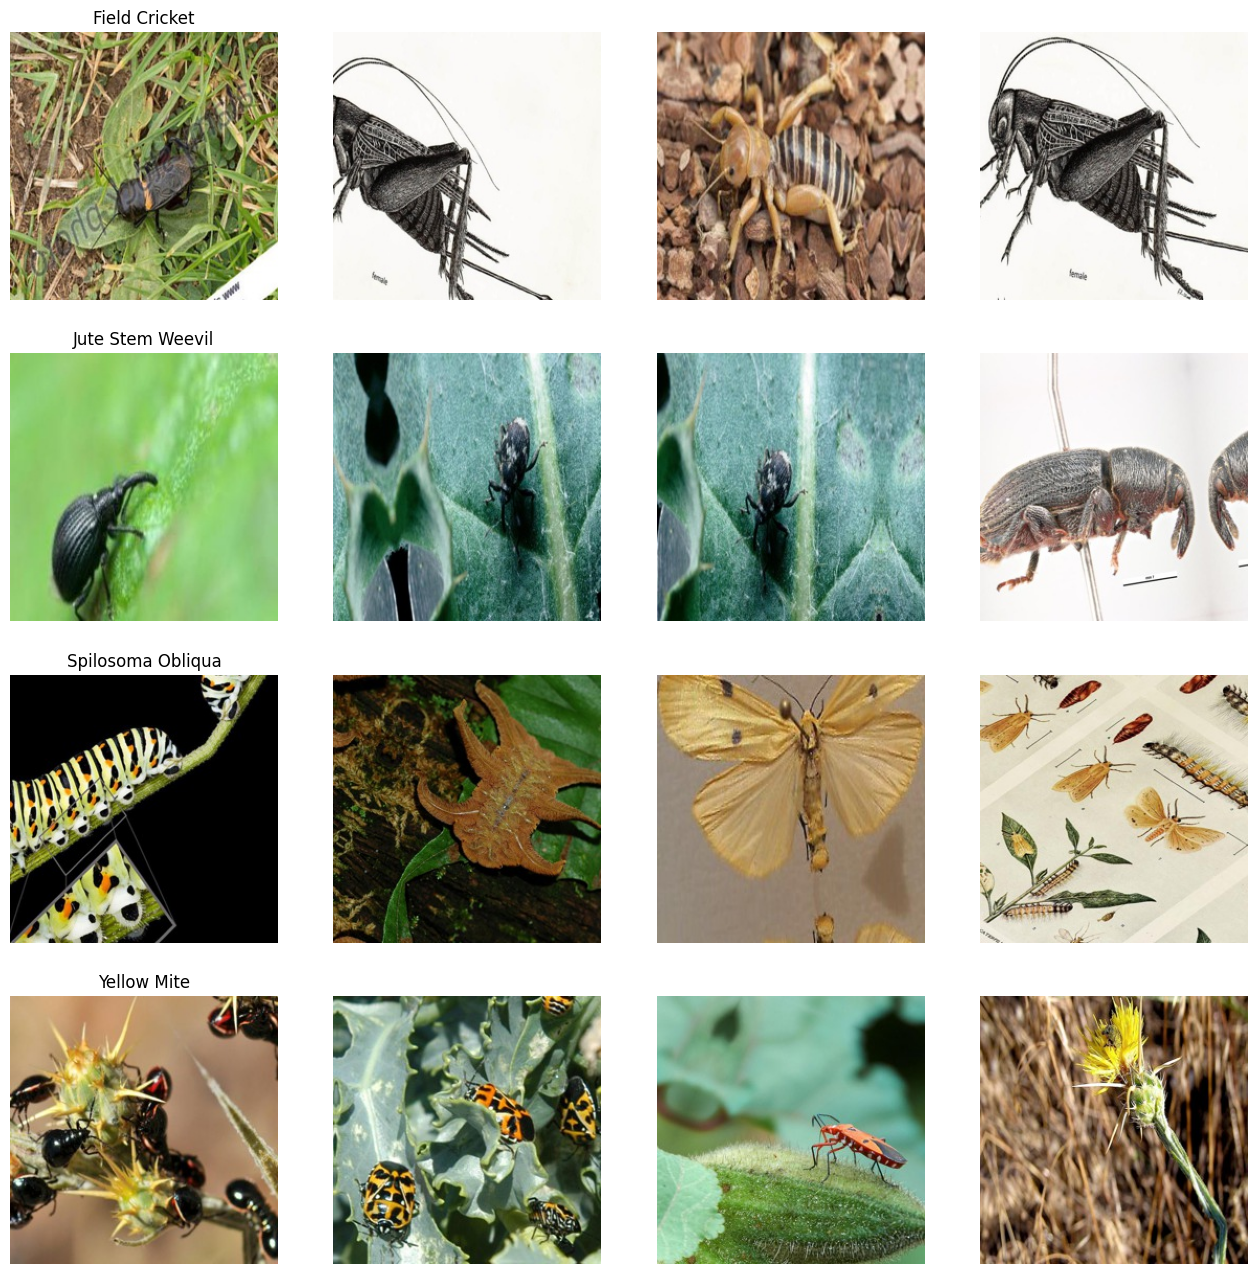

In [ ]:
# Set up matplotlib fig and size it to fit 4x4 pics
ncols = 4
nrows = 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 4

# Create train directory to hold all training images for 4 classes
train_dirs = {
    'Field Cricket': '/content/WIX3001---NN-Assignment/folder1/train/Field Cricket',
    'Jute Stem Weevil': '/content/WIX3001---NN-Assignment/folder1/train/Jute Stem Weevil',
    'Spilosoma Obliqua': '/content/WIX3001---NN-Assignment/folder1/train/Spilosoma Obliqua',
    'Yellow Mite': '/content/WIX3001---NN-Assignment/folder1/train/Yellow Mite'
}

insect_pix = []

for insect_type in train_dirs:
    insect_pix.extend(os.path.join(train_dirs[insect_type], fname)
                      for fname in os.listdir(train_dirs[insect_type])[pic_index - 4:pic_index])

for i, img_path in enumerate(insect_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

    # Add title for each row
    if i % ncols == 0:
        row_title_index = i // ncols
        plt.title(list(train_dirs.keys())[row_title_index])

plt.show()

# **Tensorflow Model**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def DataGenerator(train_directory,validation_directory,DataAugmentation = False,size = 250):

  if DataAugmentation == False:
    train_datagen = ImageDataGenerator(rescale = 1./255)

  else:
    train_datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range = 40,
        width_shift_range = 0.2,
        height_shift_range = 0.2,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True,
        fill_mode = 'nearest'
    )

  test_datagen = ImageDataGenerator(rescale = 1./255)

  train_data_generator = train_datagen.flow_from_directory(
      train_directory,
      target_size = (size,size),
      batch_size = 16,
      class_mode = 'categorical'
  )

  test_data_generator = test_datagen.flow_from_directory(
      validation_directory,
      target_size = (size,size),
      batch_size = 4,
      class_mode = 'categorical'
  )

  return train_data_generator,test_data_generator

In [ ]:
def create_model(model_type = 'COMPLEX',size = 250,dropout = False, DROPOUT_RATE = 0.0):
  # Reset states generated by Keras
  tf.keras.backend.clear_session()

  if model_type == 'SIMPLE':
      model = tf.keras.models.Sequential([
          # First Convolutional layer
          tf.keras.layers.Conv2D(128,(3,3),activation = 'relu',input_shape = (size,size,3)),
          tf.keras.layers.MaxPooling2D((2,2)),

          # Connected layer
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(128,activation = 'relu'),
          tf.keras.layers.Dense(4,activation = 'softmax'),
      ])

  elif model_type == 'MEDIUM':
    model = tf.keras.models.Sequential([
        # First Convolutional layer
        tf.keras.layers.Conv2D(128,(3,3),activation = 'relu',input_shape = (size,size,3)),
        tf.keras.layers.MaxPooling2D((2,2)),
        # Second Convolutional layer
        tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
        tf.keras.layers.MaxPooling2D((2,2)),

        # Connected layer
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64,activation = 'relu'),
        tf.keras.layers.Dropout(DROPOUT_RATE) if dropout else tf.keras.layers.Dropout(0),
        tf.keras.layers.Dense(32,activation = 'relu'),
        tf.keras.layers.Dense(4,activation = 'softmax'),
    ])



  elif model_type == 'COMPLEX':
      model = tf.keras.models.Sequential([
          # First Convolutional layer
          tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (size,size,3)),
          tf.keras.layers.MaxPooling2D((2,2)),
          # Second Convolutional layer
          tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
          tf.keras.layers.MaxPooling2D((2,2)),
          # Third Convolutional layer
          tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
          tf.keras.layers.MaxPooling2D((2,2)),
          # Forth Convolutional layer
          tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
          tf.keras.layers.MaxPooling2D((2,2)),

          # Connected layer
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(128,activation = 'relu'),
          tf.keras.layers.Dropout(DROPOUT_RATE) if dropout else tf.keras.layers.Dropout(0),
          tf.keras.layers.Dense(32,activation = 'relu'),
          tf.keras.layers.Dense(4,activation = 'softmax'),
      ])

  return model

In [ ]:
def compile_model(model,loss = 'categorical_crossentropy',optimizer = tf.keras.optimizers.Adam,learning_rate = 0.0001):
  model.compile(
      loss = loss,
      optimizer = optimizer(learning_rate = learning_rate),
      metrics = ['accuracy']
  )

In [ ]:
def fit_model(model,train_data_generator,validation_data_generator,num_epochs,verbose):
  history = model.fit(
      train_data_generator,
      epochs = num_epochs,
      steps_per_epoch = 55,
      validation_data = validation_data_generator,
      validation_steps = 30,
      verbose = verbose
  )

  return history

In [ ]:
def plot_graphs(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss =  history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs,acc,'bo',label = 'Training Accuracy')
  plt.plot(epochs,val_acc,'r',label = 'Testing Accuracy')
  plt.title("Training and Testing Accuracy")
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.figure()

  plt.plot(epochs,loss,'bo',label = 'Training Loss')
  plt.plot(epochs,val_loss,'r',label = 'Testing Loss')
  plt.title("Training and Testing Loss")
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  return np.mean(acc[-5:]),np.mean(val_acc[-5:]),np.mean(loss[-5:]),np.mean(val_loss[-5:])

In [ ]:
def train_model(train_dir,validation_dir,setting):

  MODEL_TYPE = setting[0]
  TARGET_SIZE = setting[1]
  IMAGE_AUGMENTATION = setting[2]
  DROPOUT = setting[3]
  DROPOUT_RATE =setting[4]
  NUM_EPOCHS = setting[5]
  LEARNING_RATE = setting[6]
  OPTIMIZER = tf.keras.optimizers.Adam
  VERBOSE = 0

  # Image Generator
  train_generator,validation_generator = DataGenerator(train_dir,validation_dir,IMAGE_AUGMENTATION,TARGET_SIZE)

  # Create model
  model = create_model(MODEL_TYPE,TARGET_SIZE, DROPOUT, DROPOUT_RATE)

  # Compile model
  compile_model(model,optimizer = OPTIMIZER,learning_rate = LEARNING_RATE)

  # Train model
  history = fit_model(model,train_generator,validation_generator,NUM_EPOCHS,verbose = VERBOSE)

  # Plot Accuracy and Loss graph
  acc,val_acc,loss,val_loss = plot_graphs(history)

  return acc,val_acc,loss,val_loss

In [ ]:
def print_system_info():
    gpus = GPU.getGPUs()

    return psutil.cpu_percent(interval=1),psutil.virtual_memory().percent,gpus

In [ ]:
def compare_model(settings):
    model_performances = []

    for index,setting in enumerate(settings):
      start_time = time.time()
      print((index + 1)," : ",setting)

      print("\n")

      acc,val_acc,loss,val_loss = train_model(train_folder_path,validation_folder_path,setting)

      cpu_usage,ram_usage,gpu_usage = print_system_info()
      end_time = time.time()
      total_time = round(end_time - start_time,2)

      model_performances.append([acc,val_acc,loss,val_loss,total_time,cpu_usage,ram_usage,gpu_usage])

      print("\n\n")

    # Display performance
    for index,setting in enumerate(settings):
        performance = model_performances[index]
        print(f"Performance of Setting {index + 1} - {setting}")
        print("------------------------------------------------------------------------")
        print("Average Training   accuracy of last 5 epochs : ",performance[0])
        print("Average validation accuracy of last 5 epochs : ",performance[1])
        print("Average Training   loss of last 5 epochs : ",performance[2])
        print("Average Validation loss of last 5 epochs : ",performance[3])

        print("\n")

        print("Running time : ",performance[4])
        print("CPU usage : ",performance[5],"%")
        print("RAM usage : ",performance[6],"%")

        for gpu in performance[7]:
          print("GPU", gpu.id, ":", gpu.name, "- Utilization:", gpu.load * 100, "%")
          print("GPU", gpu.id, ":", gpu.name, "- Memory Usage:", gpu.memoryUsed, "MB")
          print("GPU", gpu.id, ":", gpu.name, "- Memory Free:", gpu.memoryFree, "MB")

        print("\n")

    return model_performances

# Architecture Comparison

1  :  ['COMPLEX', 50, True, True, 0.3, 50, 1]


Found 880 images belonging to 4 classes.
Found 120 images belonging to 4 classes.


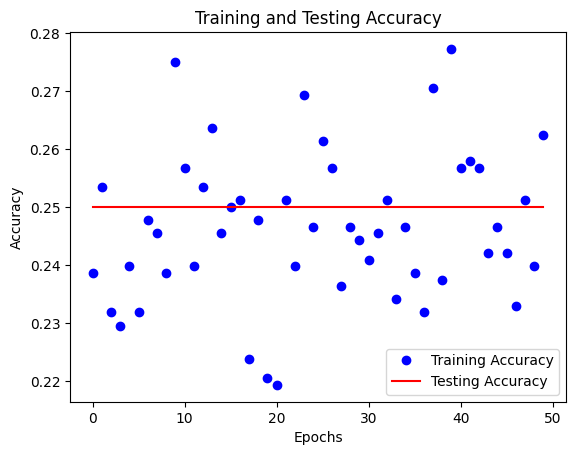

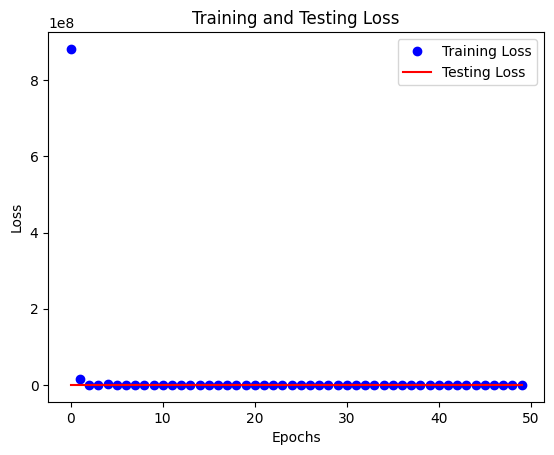




2  :  ['COMPLEX', 50, True, True, 0.3, 50, 0.1]


Found 880 images belonging to 4 classes.
Found 120 images belonging to 4 classes.


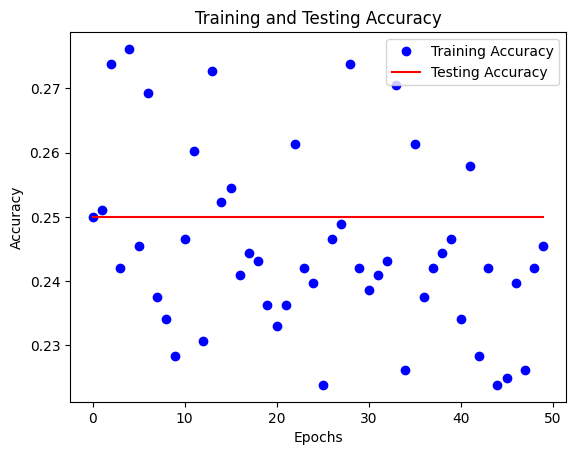

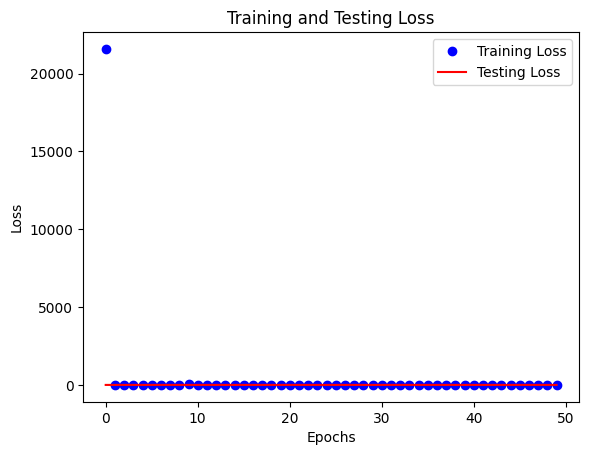




3  :  ['COMPLEX', 50, True, True, 0.3, 50, 0.01]


Found 880 images belonging to 4 classes.
Found 120 images belonging to 4 classes.


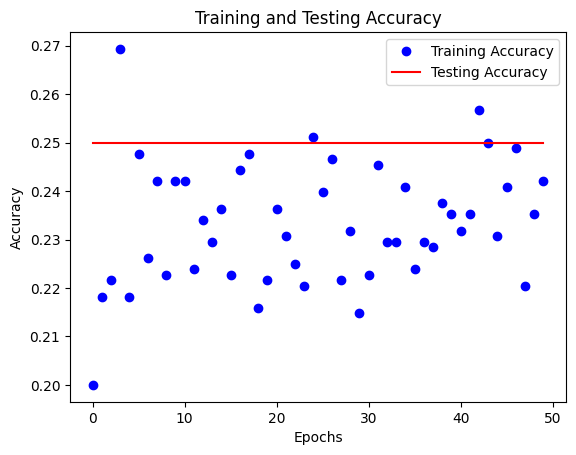

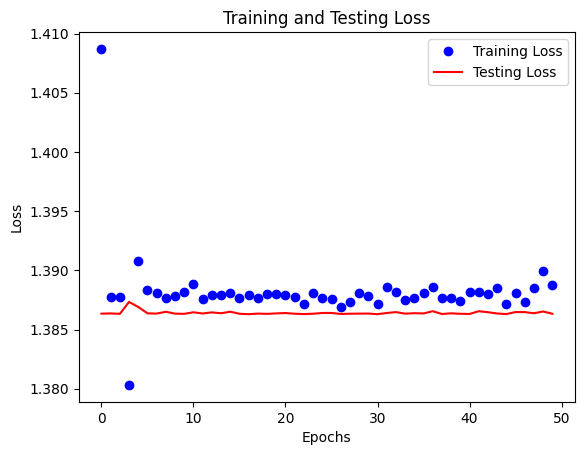




4  :  ['COMPLEX', 50, True, True, 0.3, 50, 0.001]


Found 880 images belonging to 4 classes.
Found 120 images belonging to 4 classes.


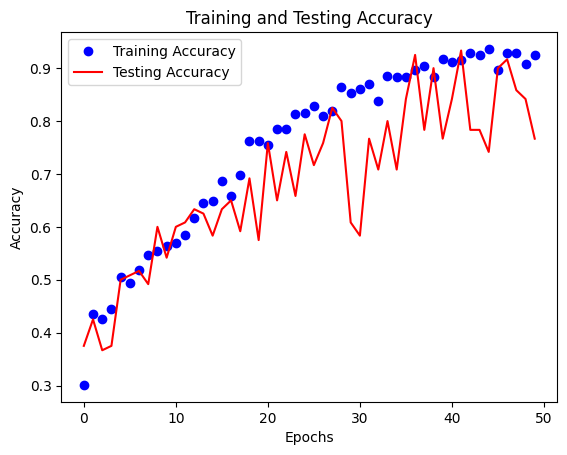

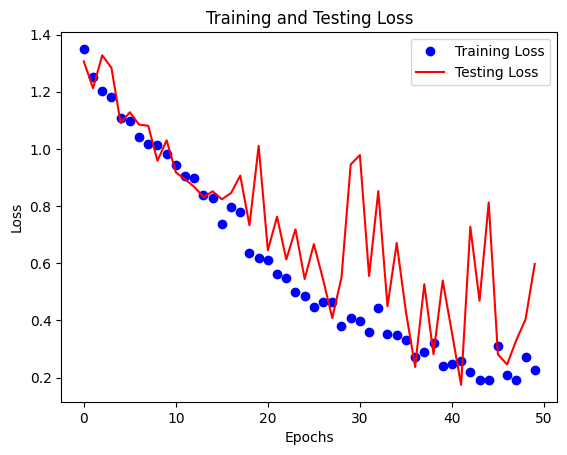




5  :  ['COMPLEX', 50, True, True, 0.3, 50, 0.0001]


Found 880 images belonging to 4 classes.
Found 120 images belonging to 4 classes.


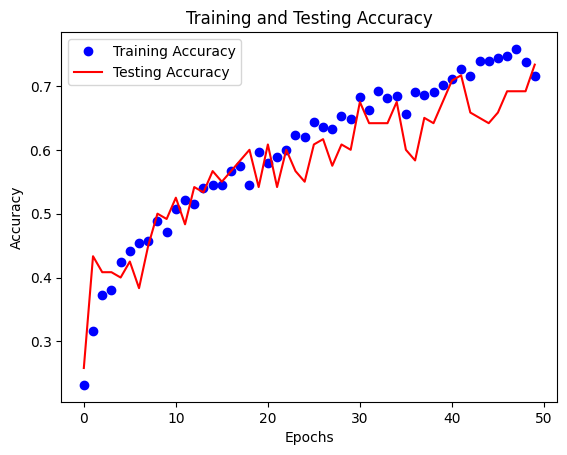

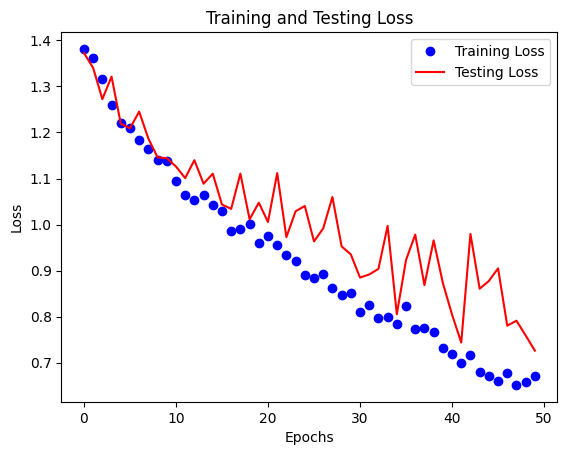




Performance of Setting 1 - ['COMPLEX', 50, True, True, 0.3, 50, 1]
------------------------------------------------------------------------
Average Training   accuracy of last 5 epochs :  0.24568181335926056
Average validation accuracy of last 5 epochs :  0.25
Average Training   loss of last 5 epochs :  1.4666569232940674
Average Validation loss of last 5 epochs :  1.4615256071090699


Running time :  124.96
CPU usage :  2.0 %
RAM usage :  16.9 %
GPU 0 : Tesla T4 - Utilization: 0.0 %
GPU 0 : Tesla T4 - Memory Usage: 269.0 MB
GPU 0 : Tesla T4 - Memory Free: 14833.0 MB


Performance of Setting 2 - ['COMPLEX', 50, True, True, 0.3, 50, 0.1]
------------------------------------------------------------------------
Average Training   accuracy of last 5 epochs :  0.23568181395530702
Average validation accuracy of last 5 epochs :  0.25
Average Training   loss of last 5 epochs :  1.3977990627288819
Average Validation loss of last 5 epochs :  1.3935960054397583


Running time :  108.73
CPU usa

In [ ]:
# MODEL_TYPE, TARGET_SIZE, IMAGE_AUGENTATION, DROPOUT, DROPOUT_RATE, NUM_EPOCHS, LEARNING_RATE

settings = [
    ['COMPLEX', 50, True, True, 0.3, 50, 1],
    ['COMPLEX', 50, True, True, 0.3, 50, 0.1],
    ['COMPLEX', 50, True, True, 0.3, 50, 0.01],
    ['COMPLEX', 50, True, True, 0.3, 50, 0.001],
    ['COMPLEX', 50, True, True, 0.3, 50, 0.0001],
]

tensorflow_model_performance = compare_model(settings)

#**Pytorch Model**

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

def DataGenerator_pytorch(train_directory, validation_directory, DataAugmentation=False, size=50):

    if DataAugmentation:
        train_transform = transforms.Compose([
            transforms.RandomRotation(40),
            transforms.RandomResizedCrop(size),
            transforms.RandomHorizontalFlip(p=1),
            transforms.RandomAffine(degrees=0, translate=(0.2, 0.2), scale=(0.8, 1.2), shear=0.2),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
    else:
        train_transform = transforms.Compose([
            transforms.Resize(size),
            transforms.CenterCrop(size),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])

    test_transform = transforms.Compose([
        transforms.Resize(size),
        transforms.CenterCrop(size),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    # Create datasets
    train_dataset = datasets.ImageFolder(train_directory, transform=train_transform)
    test_dataset = datasets.ImageFolder(validation_directory, transform=test_transform)

    # Create data loaders
    train_data_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    test_data_loader = DataLoader(test_dataset, batch_size=4)

    return train_data_loader, test_data_loader

In [ ]:
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self, size=250, dropout=False, dropout_rate=0.0):
        super(CNN, self).__init__()
        self.size = size
        self.dropout = dropout

        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)

        self.fc1 = nn.Linear(128 * 3 * 3, 128)
        self.fc2 = nn.Linear(128, 32)
        self.fc3 = nn.Linear(32, 4)

        self.dropout_layer = nn.Dropout(dropout_rate)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = self.pool(torch.relu(self.conv4(x)))
        x = x.view(-1, 128 * 3 * 3)
        x = torch.relu(self.fc1(x))
        x = self.dropout_layer(x)
        x = torch.relu(self.fc2(x))
        x = torch.softmax(self.fc3(x), dim=1)
        return x

In [ ]:
import torch.optim as optim

def compile_model_pytorch(model, loss_fn=nn.CrossEntropyLoss(), optimizer='Adam', learning_rate=0.0001):
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    return loss_fn, optimizer

In [ ]:
def fit_model_pytorch(model, train_data_loader, test_data_loader, num_epochs, loss_fn, optimizer, device, verbose=True):
    train_losses = []
    valid_losses = []
    train_accs = []
    valid_accs = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        correct_train = 0
        total_train = 0
        steps_per_epoch = 55
        validation_steps = 30
        count1, count2 = 0, 0

        for inputs, targets in train_data_loader:
            if count1 >= steps_per_epoch:
                break
            inputs, targets = inputs.to(device), targets.to(device)

            # Zero the gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = loss_fn(outputs, targets)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            # Update training loss
            train_loss += loss.item() * inputs.size(0)

            # Calculate training accuracy
            _, predicted = torch.max(outputs, 1)
            total_train += targets.size(0)
            correct_train += (predicted == targets).sum().item()

            count1 += 1

        # Calculate average training loss and accuracy for the epoch
        epoch_train_loss = train_loss / len(train_data_loader.dataset)
        epoch_train_acc = correct_train / total_train

        train_losses.append(epoch_train_loss)
        train_accs.append(epoch_train_acc)

        # Evaluation on validation set
        model.eval()  # Set the model to evaluation mode
        valid_loss = 0.0
        correct_valid = 0
        total_valid = 0

        with torch.no_grad():
            for inputs, targets in test_data_loader:
                if count2 >= validation_steps:
                    break
                inputs, targets = inputs.to(device), targets.to(device)

                # Forward pass
                outputs = model(inputs)
                loss = loss_fn(outputs, targets)

                # Update validation loss
                valid_loss += loss.item() * inputs.size(0)

                # Calculate validation accuracy
                _, predicted = torch.max(outputs, 1)
                total_valid += targets.size(0)
                correct_valid += (predicted == targets).sum().item()

                count2 += 1

        # Calculate average validation loss and accuracy for the epoch
        epoch_valid_loss = valid_loss / len(test_data_loader.dataset)
        epoch_valid_acc = correct_valid / total_valid

        valid_losses.append(epoch_valid_loss)
        valid_accs.append(epoch_valid_acc)

        # Print epoch statistics if verbose is True
        if verbose:
            print(f"Epoch {epoch + 1}/{num_epochs}, "
                  f"Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_acc:.4f}, "
                  f"Valid Loss: {epoch_valid_loss:.4f}, Valid Acc: {epoch_valid_acc:.4f}")

    # Return training history
    return {
        'train_losses': train_losses,
        'valid_losses': valid_losses,
        'train_accs': train_accs,
        'valid_accs': valid_accs
    }

In [ ]:
def plot_graphs_pytorch(history):
    train_losses = history['train_losses']
    valid_losses = history['valid_losses']
    train_accs = history['train_accs']
    valid_accs = history['valid_accs']

    epochs = range(len(train_losses))

    # Plot training and validation accuracy
    plt.plot(epochs, train_accs, 'bo', label='Training Accuracy')
    plt.plot(epochs, valid_accs, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.figure()
    plt.plot(epochs, train_losses, 'bo', label='Training Loss')
    plt.plot(epochs, valid_losses, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    return np.mean(train_accs[-5:]),np.mean(valid_accs[-5:]),np.mean(train_losses[-5:]),np.mean(valid_losses[-5:])

In [ ]:
def train_model_pytorch(train_dir,validation_dir,setting):

  TARGET_SIZE = setting[0]
  IMAGE_AUGMENTATION = setting[1]
  DROPOUT = setting[2]
  DROPOUT_RATE =setting[3]
  NUM_EPOCHS = setting[4]
  LEARNING_RATE = setting[5]
  OPTIMIZER = optim.Adam
  VERBOSE = 0
  DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

  # Image Generator
  train_generator_pytorch,validation_generator_pytorch = DataGenerator_pytorch(train_dir,validation_dir,IMAGE_AUGMENTATION,TARGET_SIZE)

  # Create the model
  model_pytorch = CNN()
  model_pytorch.to(DEVICE)

  # Compile model
  loss_fn, optimizer = compile_model_pytorch(model_pytorch,optimizer = OPTIMIZER,learning_rate = LEARNING_RATE)

  # Train model
  history_pytorch = fit_model_pytorch(model_pytorch,train_generator_pytorch,validation_generator_pytorch,NUM_EPOCHS,loss_fn, optimizer,DEVICE,verbose = VERBOSE)

  # Plot Accuracy and Loss graph
  acc,val_acc,loss,val_loss = plot_graphs_pytorch(history_pytorch)

  return acc,val_acc,loss,val_loss

In [ ]:
def compare_model(settings):
    model_performances = []

    for index,setting in enumerate(settings):
      start_time = time.time()
      print((index + 1)," : ",setting)

      print("\n")

      acc,val_acc,loss,val_loss = train_model(train_folder_path,validation_folder_path,setting)

      cpu_usage,ram_usage,gpu_usage = print_system_info()
      end_time = time.time()
      total_time = round(end_time - start_time,2)

      model_performances.append([acc,val_acc,loss,val_loss,total_time,cpu_usage,ram_usage,gpu_usage])

      print("\n\n")

    # Display performance
    for index,setting in enumerate(settings):
      performance = model_performances[index]
      print(f"Performance of Setting {index + 1} - {setting}")
      print("------------------------------------------------------------------------")
      print("Training   accuracy : ",performance[0])
      print("Validation accuracy : ",performance[1])
      print("Training   loss : ",performance[2])
      print("Validation loss : ",performance[3])

      print("\n")

      print("Running time : ",performance[4])
      print("CPU usage : ",performance[5],"%")
      print("RAM usage : ",performance[6],"%")

      for gpu in performance[7]:
        print("GPU", gpu.id, ":", gpu.name, "- Utilization:", gpu.load * 100, "%")
        print("GPU", gpu.id, ":", gpu.name, "- Memory Usage:", gpu.memoryUsed, "MB")
        print("GPU", gpu.id, ":", gpu.name, "- Memory Free:", gpu.memoryFree, "MB")

      print("\n")

1  :  [50, True, True, 0.3, 50, 1]




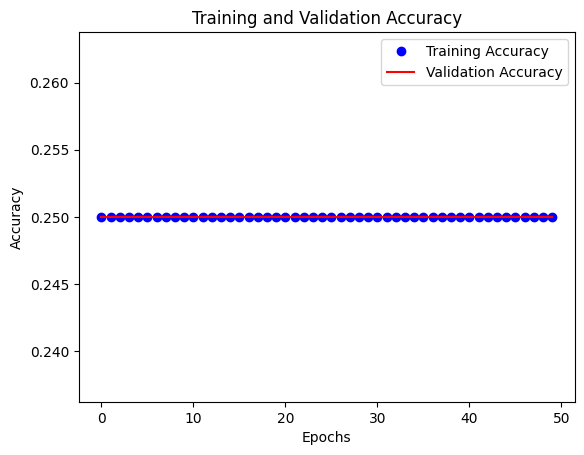

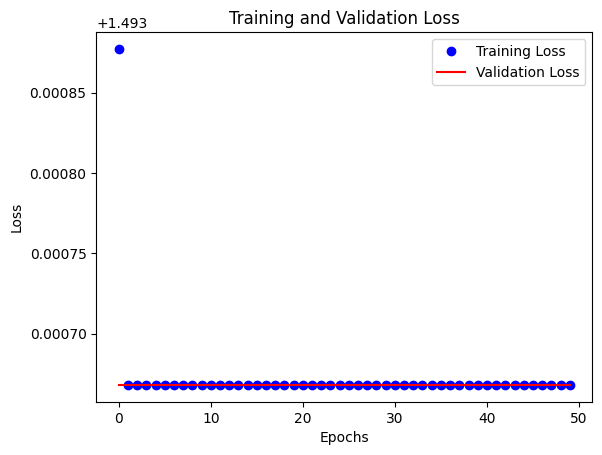




2  :  [50, True, True, 0.3, 50, 0.1]




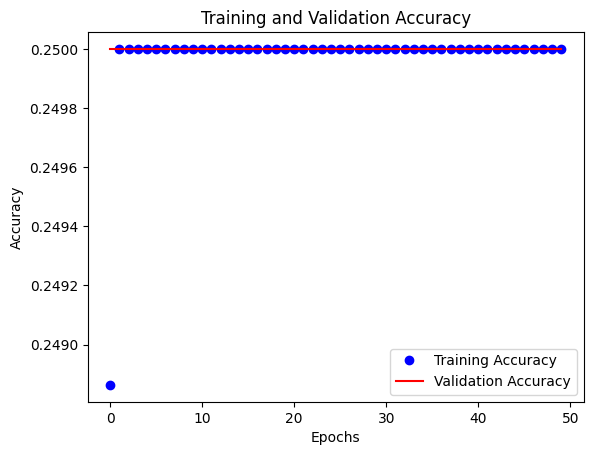

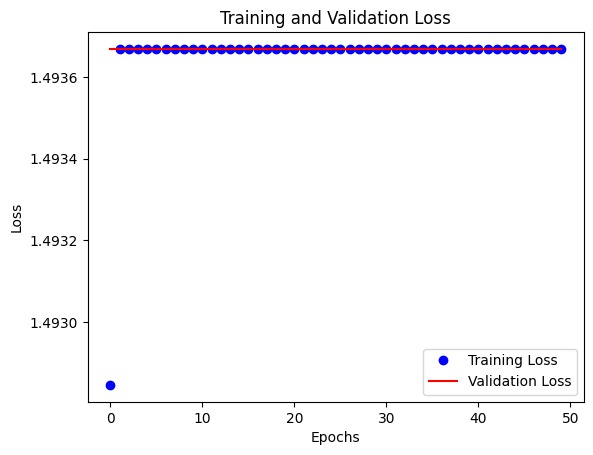




3  :  [50, True, True, 0.3, 50, 0.01]




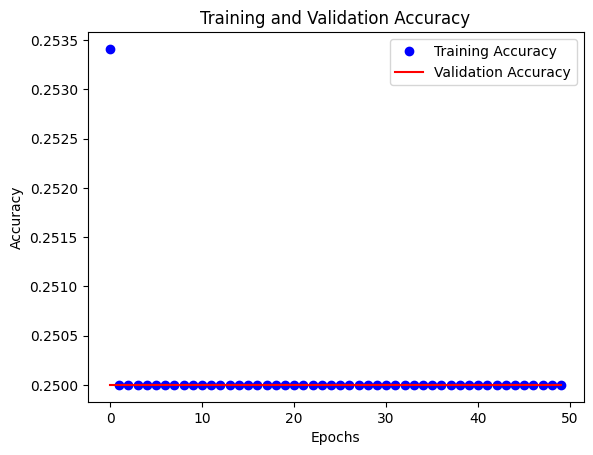

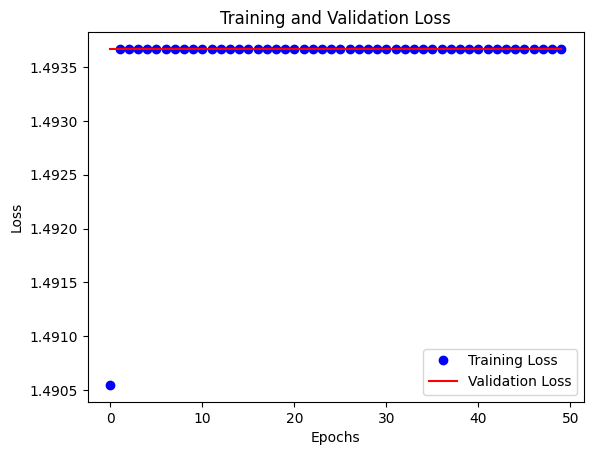




4  :  [50, True, True, 0.3, 50, 0.001]




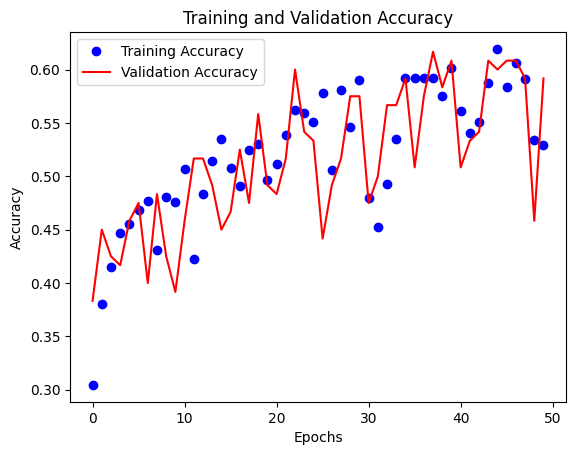

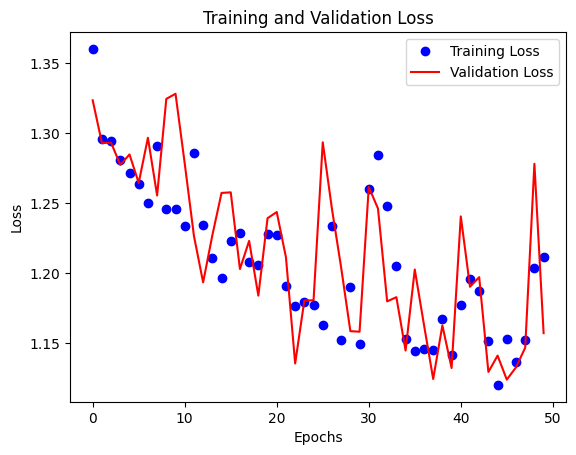




5  :  [50, True, True, 0.3, 50, 0.0001]




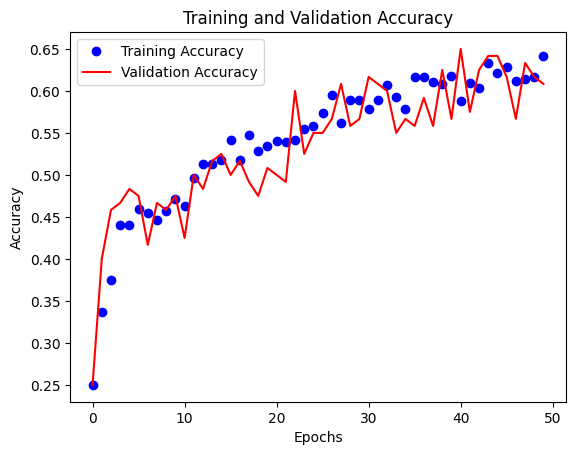

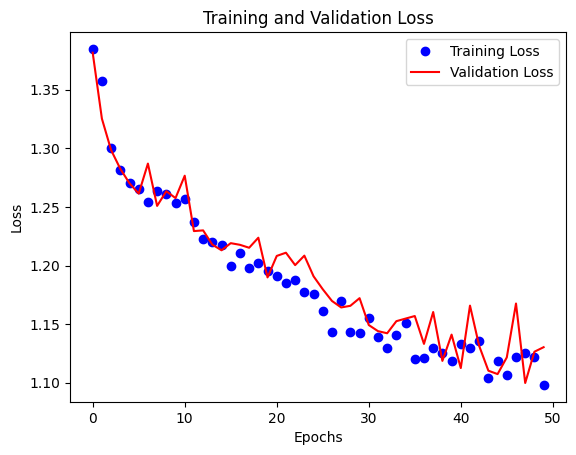




Performance of Setting 1 - ['COMPLEX', 50, True, True, 0.3, 50, 1]
------------------------------------------------------------------------
Average Training   accuracy of last 5 epochs :  0.25
Average validation accuracy of last 5 epochs :  0.25
Average Training   loss of last 5 epochs :  1.4936681881817904
Average Validation loss of last 5 epochs :  1.4936684370040894


Running time :  111.81
CPU usage :  2.5 %
RAM usage :  21.3 %
GPU 0 : Tesla T4 - Utilization: 0.0 %
GPU 0 : Tesla T4 - Memory Usage: 379.0 MB
GPU 0 : Tesla T4 - Memory Free: 14723.0 MB


Performance of Setting 2 - ['COMPLEX', 50, True, True, 0.3, 50, 0.1]
------------------------------------------------------------------------
Average Training   accuracy of last 5 epochs :  0.25
Average validation accuracy of last 5 epochs :  0.25
Average Training   loss of last 5 epochs :  1.4936681899157438
Average Validation loss of last 5 epochs :  1.4936684370040894


Running time :  113.03
CPU usage :  22.6 %
RAM usage :  21.6

In [ ]:
# TARGET_SIZE, IMAGE_AUGENTATION, DROPOUT, DROPOUT_RATE, NUM_EPOCHS, LEARNING_RATE
settings_pytorch = [
    [50, True,  True, 0.3, 50 , 1],
    [50, True,  True, 0.3, 50 , 0.1],
    [50, True,  True, 0.3, 50 , 0.01],
    [50, True,  True, 0.3, 50 , 0.001],
    [50, True,  True, 0.3, 50 , 0.0001]
]


pytorch_model_performances = []

for index, setting in enumerate(settings_pytorch):
  start_time = time.time()
  print((index + 1)," : ",setting)

  print("\n")

  acc,val_acc,loss,val_loss = train_model_pytorch(train_folder_path,validation_folder_path,setting)

  cpu_usage,ram_usage,gpu_usage = print_system_info()
  end_time = time.time()
  total_time = round(end_time - start_time,2)

  pytorch_model_performances.append([acc,val_acc,loss,val_loss,total_time,cpu_usage,ram_usage,gpu_usage])

  print("\n\n")

# Display performance
for index,setting in enumerate(settings):
  performance = pytorch_model_performances[index]
  print(f"Performance of Setting {index + 1} - {setting}")
  print("------------------------------------------------------------------------")
  print("Average Training   accuracy of last 5 epochs : ",performance[0])
  print("Average validation accuracy of last 5 epochs : ",performance[1])
  print("Average Training   loss of last 5 epochs : ",performance[2])
  print("Average Validation loss of last 5 epochs : ",performance[3])

  print("\n")

  print("Running time : ",performance[4])
  print("CPU usage : ",performance[5],"%")
  print("RAM usage : ",performance[6],"%")

  for gpu in performance[7]:
    print("GPU", gpu.id, ":", gpu.name, "- Utilization:", gpu.load * 100, "%")
    print("GPU", gpu.id, ":", gpu.name, "- Memory Usage:", gpu.memoryUsed, "MB")
    print("GPU", gpu.id, ":", gpu.name, "- Memory Free:", gpu.memoryFree, "MB")

  print("\n")

In [ ]:
col = ["Training Accuracy","Validation Accuracy",'Training Loss','Validation Loss','Running Time', "CPU Usage" ,"Ram Usage", 'GPU']
tf_df = pd.DataFrame(tensorflow_model_performance,columns = col)
tf_df['GPU Utilization'] = tf_df["GPU"].apply(lambda gpu: gpu[0].load * 100)
tf_df['GPU Memory Usage'] = tf_df['GPU'].apply(lambda gpu: gpu[0].memoryUsed)
tf_df['GPU Memory Free'] = tf_df['GPU'].apply(lambda gpu: gpu[0].memoryFree)
tf_df.drop('GPU',axis = 1,inplace = True)
tf_df.set_index(pd.Series(['1.0','0,1','0.01','0.001','0.0001']), inplace=True)
tf_df.rename_axis('Learning Rate',inplace = True)
tf_df

,Training Accuracy,Validation Accuracy,Training Loss,Validation Loss,Running Time,CPU Usage,Ram Usage,GPU Utilization,GPU Memory Usage,GPU Memory Free
Learning Rate,,,,,,,,,,
1.0,0.245682,0.250000,1.466657,1.461526,124.96,2.0,16.9,0.0,269.0,14833.0
"0,1",0.235682,0.250000,1.397799,1.393596,108.73,1.5,17.4,0.0,269.0,14833.0
0.01,0.237500,0.250000,1.388535,1.386436,113.10,50.3,17.7,0.0,269.0,14833.0
0.001,0.917500,0.856667,0.242335,0.371973,113.23,2.0,17.9,0.0,269.0,14833.0
0.0001,0.740455,0.693333,0.663747,0.792534,111.85,21.1,18.3,0.0,269.0,14833.0


In [ ]:
pt_df = pd.DataFrame(pytorch_model_performances,columns = col)
pt_df['GPU Utilization'] = pt_df["GPU"].apply(lambda gpu: gpu[0].load * 100)
pt_df['GPU Memory Usage'] = pt_df['GPU'].apply(lambda gpu: gpu[0].memoryUsed)
pt_df['GPU Memory Free'] = pt_df['GPU'].apply(lambda gpu: gpu[0].memoryFree)
pt_df.drop('GPU',axis = 1,inplace = True)
pt_df.set_index(pd.Series(['1.0','0,1','0.01','0.001','0.0001']), inplace=True)
pt_df.rename_axis('Learning Rate',inplace = True)
pt_df

,Training Accuracy,Validation Accuracy,Training Loss,Validation Loss,Running Time,CPU Usage,Ram Usage,GPU Utilization,GPU Memory Usage,GPU Memory Free
Learning Rate,,,,,,,,,,
1.0,0.250000,0.250000,1.493668,1.493668,111.81,2.5,21.3,0.0,379.0,14723.0
"0,1",0.250000,0.250000,1.493668,1.493668,113.03,22.6,21.6,0.0,379.0,14723.0
0.01,0.250000,0.250000,1.493668,1.493668,110.89,27.8,21.9,0.0,379.0,14723.0
0.001,0.568864,0.571667,1.171262,1.167641,107.32,51.5,21.9,0.0,379.0,14723.0
0.0001,0.622500,0.608333,1.114939,1.129118,108.20,55.3,22.0,0.0,379.0,14723.0
